<a href="https://colab.research.google.com/github/mvlier/topapprox/blob/develop/Interactive_Tutorial_topapprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install the latest topapprox package

This may take around a minute.

In [1]:
# !pip install git+https://github.com/mvlier/topapprox@main

In [2]:
# we need to install additional packages for some examples
# !pip install -U -q cripser persim

# Tutorial

Import the package.

In [3]:
import topapprox as ta

Import other necessary packages for this tutorial.

In [4]:
import cripser, persim
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False
import warnings
warnings.filterwarnings("ignore")

##  Toy example with a 1D signal

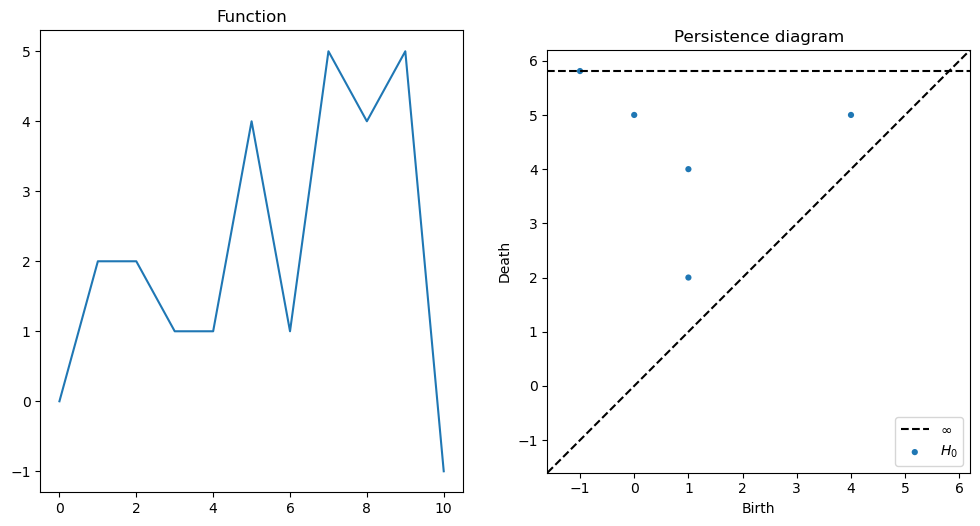

In [5]:
# Define some artificial 1D array
img = np.array([[0,2,2,1,1,4,1,5,4,5,-1]])

def plot_1d_with_pers(img, *, epsilon=0):
    '''Function for plotting 1D image with persistence diagram'''
    plt.close("all")
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    # Plotting the function on the left
    ax[0].plot(img.ravel())
    ax[0].set_title("Function")

    # Computing and plotting the diagram on the right
    pd = cripser.computePH(img, maxdim=0)
    pd = pd[:,1:3]
    persim.plot_diagrams(pd, ax=ax[1])
    ax[1].set_title("Persistence diagram")
    if epsilon:
        ax[1].plot([-100,100], [-100+epsilon,100+epsilon], '--', linewidth=0.5, c="r")

plot_1d_with_pers(img)

In [6]:
# Create the class before applying the filter
uf = ta.TopologicalFilterImage(img)

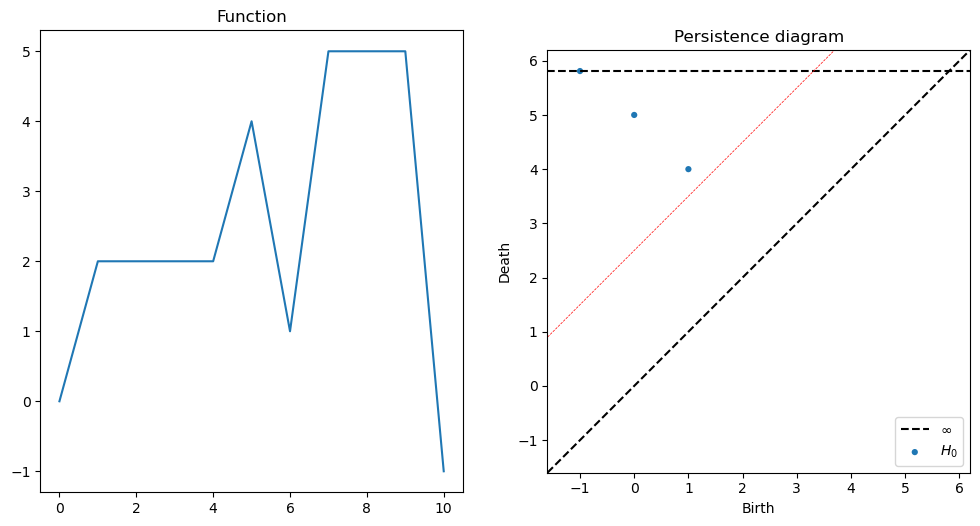

In [7]:
# Perform the filtering with threshold
epsilon = 2.5
img_filtered = uf.low_pers_filter(epsilon)

# PLOTTING WITH PERSISTENCE DIAGRAM
plot_1d_with_pers(img_filtered, epsilon=epsilon)


In [8]:
# regions associated with parents
uf.get_persistence(reduced=False)

array([[ 1.,  2.,  3.,  2.,  2.,  2.,  0.],
       [ 1.,  4.,  6.,  5.,  1.,  2.,  0.],
       [ 4.,  5.,  8.,  7.,  1.,  2.,  0.],
       [ 0.,  5.,  0.,  9., 10.,  1.,  1.],
       [-1., inf, 10., -1., inf,  0.,  2.]])

In [9]:
# regions associated with parents
parent, linking_vertex, root, children = uf.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [10  0  0  0  3  0  0  0  0  0 10]
Linking_vertex: [ 9  1  1  2  3  5  5  7  7  9 -1]
Root: 10
Children: [[1, 2, 3, 5, 6, 7, 8, 9], [], [], [4], [], [], [], [], [], [], [0]]


## 1D example with basin size filtering

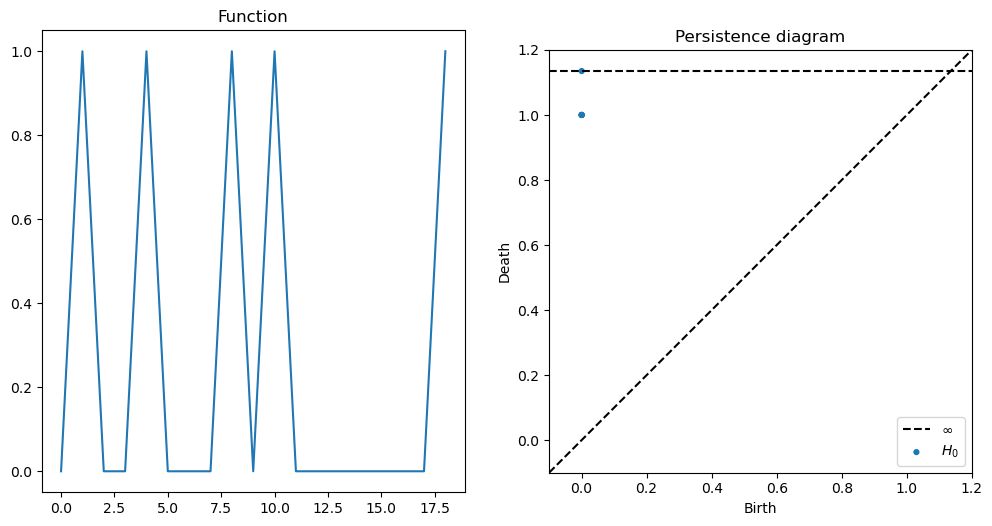

In [10]:
# Define some artificial 1D array
img = np.array([[0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1]])

plot_1d_with_pers(img)

In [11]:
# Create the class before applying the filter
uf = ta.TopologicalFilterImage(img)

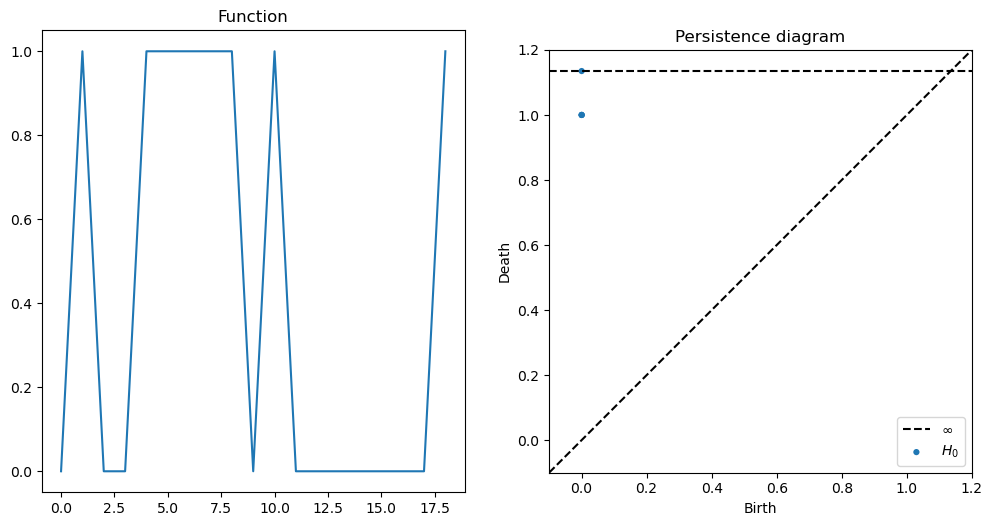

In [12]:
# Perform the filtering with threshold and basin size_range
epsilon = 2
size_range = [2.5,3]
img_filtered = uf.low_pers_filter(epsilon, size_range=size_range)

# PLOTTING WITH PERSISTENCE DIAGRAM
plot_1d_with_pers(img_filtered, epsilon=epsilon)


In [13]:
# regions associated with parents
uf.get_persistence(reduced=False)

array([[ 0.,  1.,  2.,  1.,  2.,  1.,  0.],
       [ 0.,  1.,  5.,  4.,  3.,  1.,  0.],
       [ 0.,  1.,  9.,  8.,  1.,  1.,  0.],
       [ 0.,  1., 11., 10.,  7.,  1.,  0.],
       [ 0., inf,  0., -1., inf,  0.,  1.]])

In [14]:
# regions associated with parents
parent, linking_vertex, root, children = uf.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [ 0  0  0  2  0  0  5  5  0  0  0  0 11 11 11 11 11 11  0]
Linking_vertex: [-1  1  1  2  4  4  5  6  8  8 10 10 11 12 13 14 15 16 18]
Root: 0
Children: [[1, 2, 4, 5, 8, 9, 10, 11, 18], [], [3], [], [], [6, 7], [], [], [], [], [], [12, 13, 14, 15, 16, 17], [], [], [], [], [], [], []]


##  Toy example with a 2D image

We can construct an image by setting the values of each pixel as follows.

In [15]:
img = np.array([[0, 5, 3],\
                [5,6,4],\
                [2, 5, 1]])

We can visualize the image together with its persistence diagram as follows:

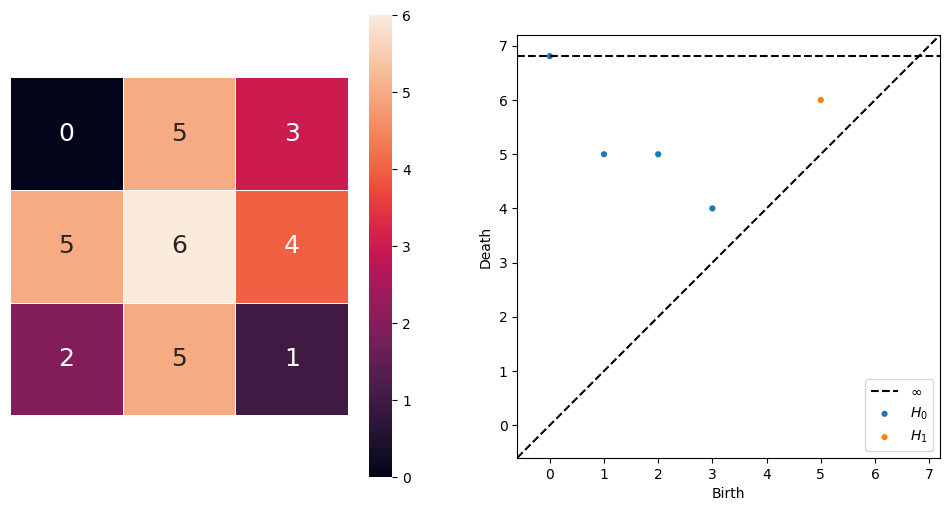

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# plotting image on the left
sns.heatmap(img, annot=True, linewidths=0.5, square=True, yticklabels=False, xticklabels=False, annot_kws={"fontsize":18}, ax=ax[0])

# computing persistence diagram with cubical ripser
pd = cripser.computePH(img)
pd = [pd[pd[:,0]==i,1:3] for i in range(2)] # separate only [birth, death] pairs
persim.plot_diagrams(pd, ax=ax[1])


### PH0: 0-dimensional

Next, we apply the 0 Low Persistence Filter (LPF) with threshold $\epsilon=2$:

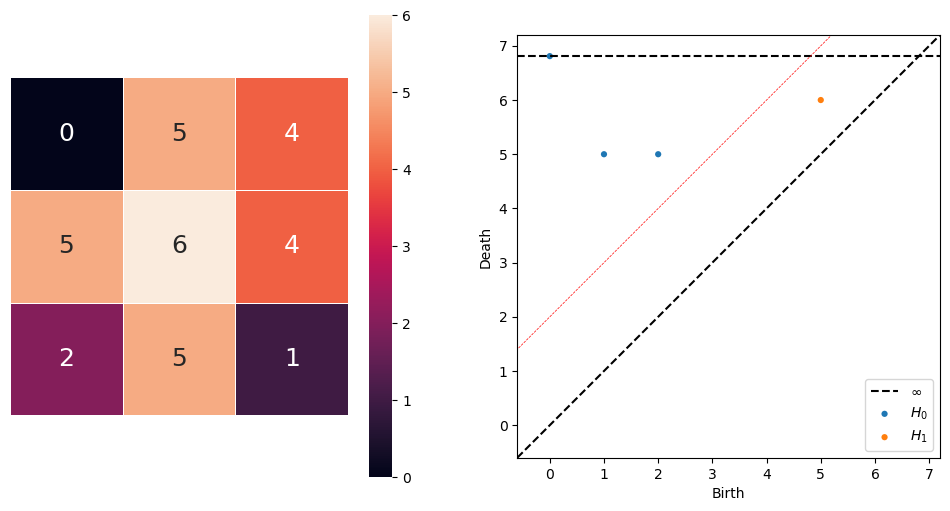

In [17]:
# thresholf value
eps = 2

# Filtering 0-homology classes with persistence less than 2
uf = ta.TopologicalFilterImage(img, dual=False)
img_filtered = uf.low_pers_filter(eps)

# Colsing preview plot (to prevent memory overload)
plt.close('all')

# Plotting filtered verison
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# image on the left
sns.heatmap(img_filtered, annot=True, linewidths=0.5, square=True, yticklabels=False, xticklabels=False, annot_kws={"fontsize":18}, ax=ax[0])

# computing persistence diagram with cubical ripser
pd = cripser.computePH(img_filtered)
pd = [pd[pd[:,0]==i,1:3] for i in range(2)] # separate only [birth, death] pairs
# Plotting diagram on the right
persim.plot_diagrams(pd, ax=ax[1])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=0.5, c="r")
plt.show()

In [18]:
# regions associated with parents
parent, linking_vertex, root, children = uf.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [0 0 8 0 0 2 0 0 0]
Linking_vertex: [-1  1  5  3  4  5  3  7  1]
Root: 0
Children: [[1, 8, 3, 6, 7, 4], [], [5], [], [], [], [], [], [2]]


We can see in the image above that the lowest $0$-homology interval was eliminated.\
In the code cell above if we change `eps` to `3.5` and `4.5` we can see the result of filtering the middle interval and all the intervals, respectively.

We can see that `uf.persistence` has the $0$-homology persistence diagram of the original image `img`. 
More precisely, `uf.persistence` is a numpy array of shape `(n, 3)`, with `n` being the number of intervals in the diagram, and each triple is given by `[birth, death, birth_location]`, in which birth and death are simply the birth and death values, and birth_location is the pixel location of the initial generator of that interval (this location is given as an index for the flattened image, so in a 3x3 image as above, index 6 corresponds to position (2, 0)).

In [19]:
uf.get_persistence(reduced=False)

array([[ 3.,  4.,  2.,  5.,  2.,  2.,  0.],
       [ 1.,  5.,  8.,  1.,  3.,  1.,  1.],
       [ 2.,  5.,  6.,  3.,  1.,  1.,  0.],
       [ 0., inf,  0., -1., inf,  0.,  2.]])

## PH1: 1-dimensional

We can do the same thing as above but for $1$-homology, by simply intializing the `TopologicalFilterImage` class with the keyword argument `dual=True`.

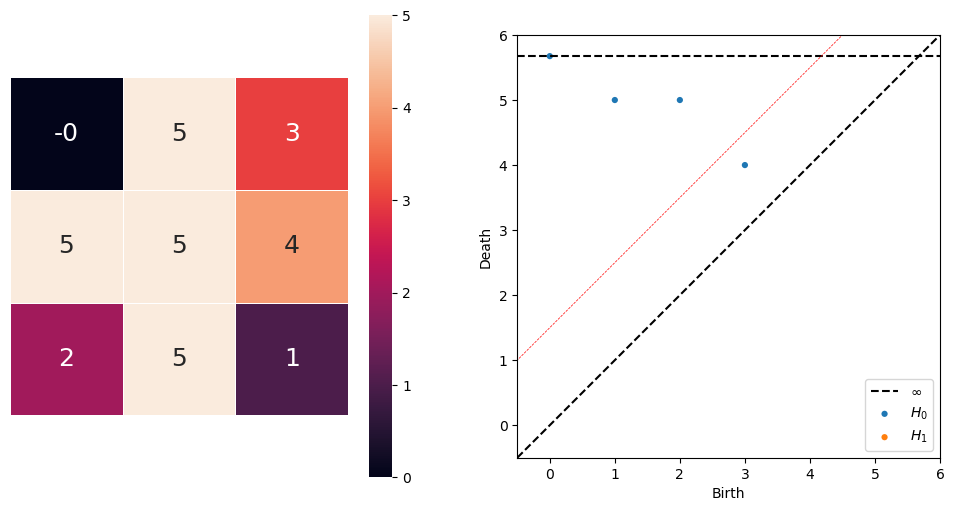

In [20]:
# thresholf value
eps = 1.5

# Filtering 0-homology classes with persistence less than 2
uf_dual = ta.TopologicalFilterImage(img, dual=True)
img_filtered1 = uf_dual.low_pers_filter(eps)

# Colsing preview plot (to prevent memory overload)
plt.close('all')

# Plotting filtered verison
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# image on the left
sns.heatmap(img_filtered1, annot=True, linewidths=0.5, square=True, yticklabels=False, xticklabels=False, annot_kws={"fontsize":18}, ax=ax[0])

# computing persistence diagram with cubical ripser
pd = cripser.computePH(img_filtered1)
pd = [pd[pd[:,0]==i,1:3] for i in range(2)] # separate only [birth, death] pairs
# Plotting diagram on the right
persim.plot_diagrams(pd, ax=ax[1])
ax[1].plot([-100,100], [-100+eps,100+eps], '--', linewidth=0.5, c="r")
plt.show()

In [21]:
# regions associated with parents
parent, linking_vertex, root, children = uf_dual.get_BHT(with_children=True)
print(f"Parents: {parent}")
print(f"Linking_vertex: {linking_vertex}")
print(f"Root: {root}")
print(f"Children: {children}")

Parents: [9 4 9 9 9 9 9 9 9 9]
Linking_vertex: [ 0  1  2  1  1  5  6  3  8 -1]
Root: 9
Children: [[], [], [], [], [1], [], [], [], [], [4, 3, 7, 5, 2, 6, 8, 0]]


In [22]:
uf_dual.get_persistence()

array([[5., 6., 1., 4., 2., 1., 0.]])

## Example with a real image

In [23]:
import urllib
import os

# download image
download_url = "https://github.com/mvlier/topapprox/raw/main/Paper%20examples/pagoda.npy"
fn = "pagoda.npy"
if not os.path.isfile(fn):
    urllib.request.urlretrieve(download_url, fn)

img = np.load(fn)

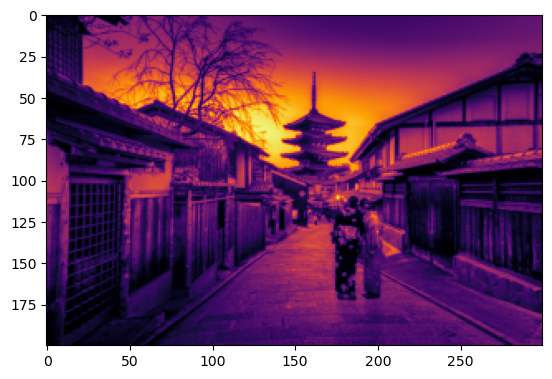

In [24]:
from skimage.transform import rescale, resize, downscale_local_mean
import skimage
from tqdm.auto import tqdm
import cripser, persim
plt.rcParams['text.usetex'] = False

cmap = 'inferno'
n,m = 200,300
img = resize(img,(n,m))
plt.imshow(img, cmap=cmap)

  0%|          | 0/4 [00:00<?, ?it/s]

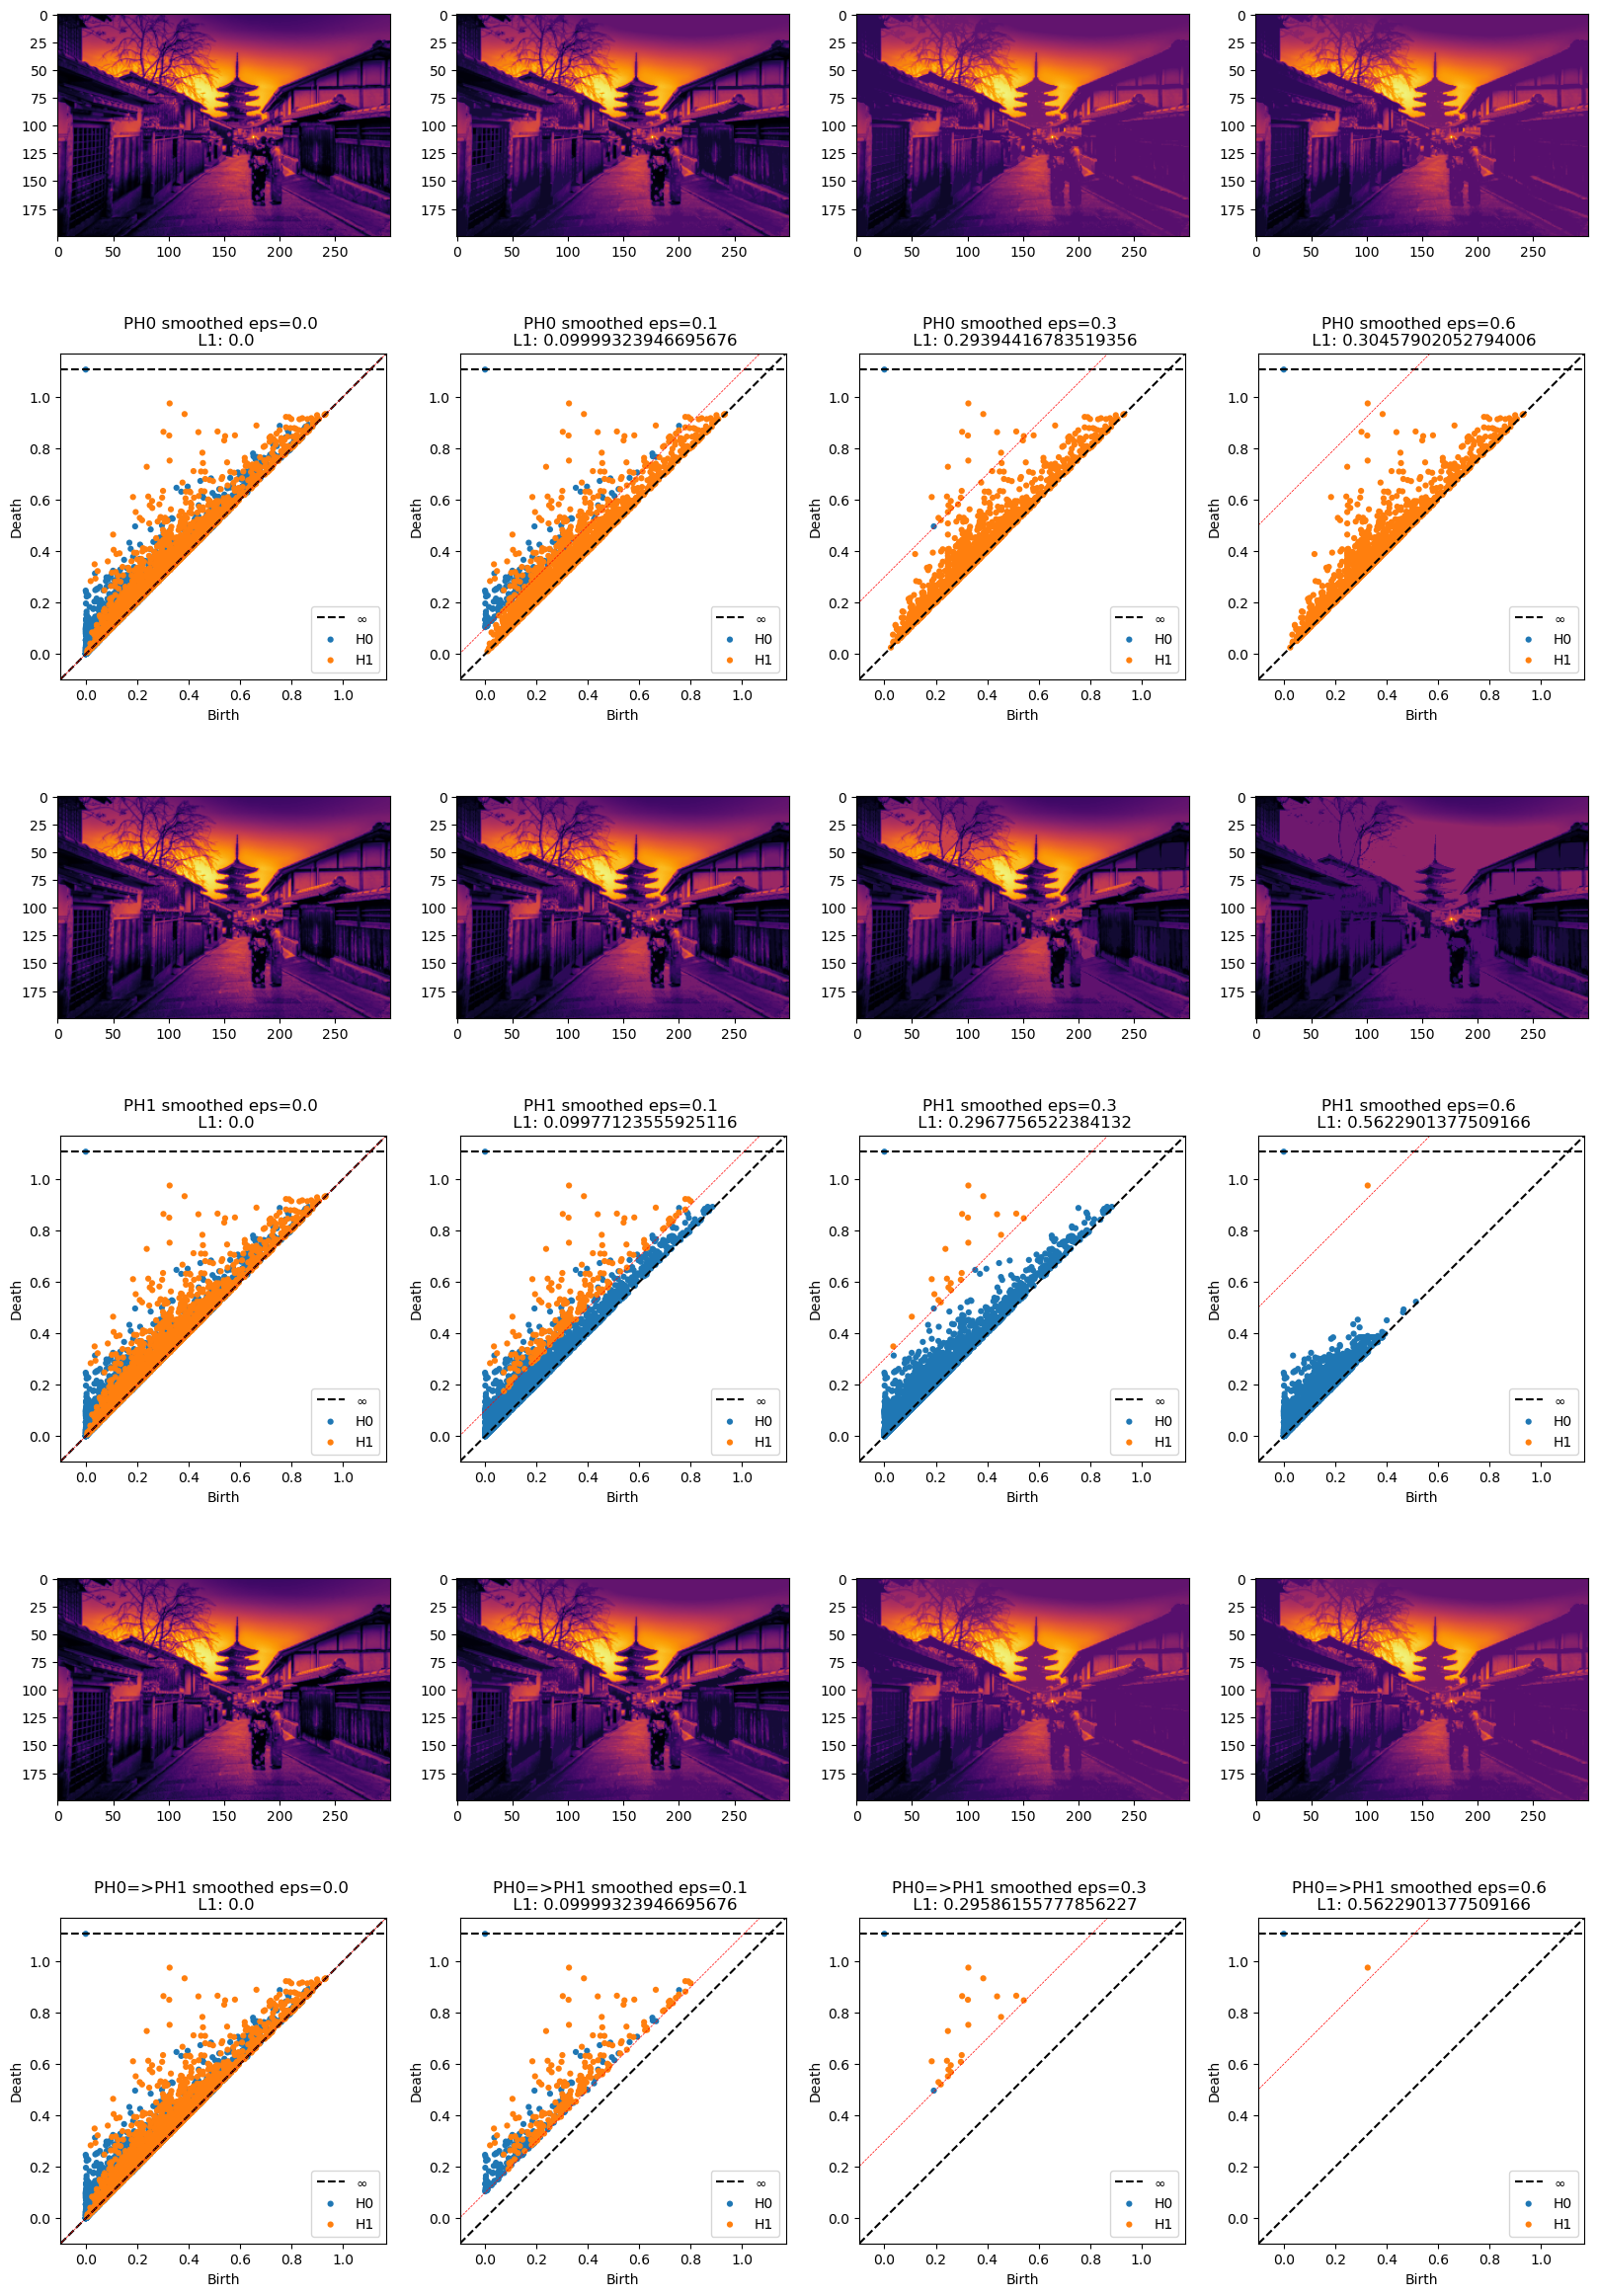

In [25]:
# filtering with different thresholds

thresholds=[0.0,0.1,0.3,0.6] # filtering thresholds
PD_original = cripser.computePH(img)
PD_original = [PD_original[PD_original[:,0]==i,1:3] for i in range(2)]

fig, axs = plt.subplots(6,len(thresholds),figsize=(20,30))
smoothed={}
smoothed1={}
smoothed2={}
a=ta.TopologicalFilterImage(img)
b=ta.TopologicalFilterImage(img, dual=True)
for i,s in enumerate(tqdm(thresholds)):
  PD_cutoff = [PD_original[i][PD_original[i][:,1]-PD_original[i][:,0]>=s] for i in range(2)]

  # PH0 smoothing
  smoothed[s] =a.low_pers_filter(epsilon=s)
  axs[0,i].imshow(smoothed[s], cmap=cmap)
  PD_smoothed = cripser.computePH(smoothed[s])
  PD_smoothed = [PD_smoothed[PD_smoothed[:,0]==i,1:3] for i in range(2)]
  PD_smoothed_cutoff = [PD_smoothed[i][PD_smoothed[i][:,1]-PD_smoothed[i][:,0]>=s] for i in range(2)]
  persim.plot_diagrams(PD_smoothed,labels=["H0","H1"],ax=axs[1,i])
  axs[1,i].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
  axs[1,i].set_title(f'PH0 smoothed eps={s} \n L1: {np.max(np.abs(smoothed[s]-img))}')# \n distance PH0: {persim.bottleneck(PD_smoothed[0],PD_cutoff[0])}\n PH1: {persim.bottleneck(PD_smoothed_cutoff[1],PD_cutoff[1])}')

  # PH1 smoothing
  smoothed1[s] =b.low_pers_filter(epsilon=s)
  axs[2,i].imshow(smoothed1[s], cmap=cmap)
  PD_smoothed = cripser.computePH(smoothed1[s])
  PD_smoothed = [PD_smoothed[PD_smoothed[:,0]==i,1:3] for i in range(2)]
  PD_smoothed_cutoff = [PD_smoothed[i][PD_smoothed[i][:,1]-PD_smoothed[i][:,0]>=s] for i in range(2)]
  persim.plot_diagrams(PD_smoothed,labels=["H0","H1"],ax=axs[3,i])
  axs[3,i].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
  axs[3,i].set_title(f'PH1 smoothed eps={s} \n L1: {np.max(np.abs(smoothed1[s]-img))}')# \n distance PH0: {persim.bottleneck(PD_smoothed[0],PD_cutoff[0])}\n PH1: {persim.bottleneck(PD_smoothed_cutoff[1],PD_cutoff[1])}')

  # PH0 => PH1 smoothing
  c=ta.TopologicalFilterImage(smoothed[s],dual=True)
  smoothed2[s] = c.low_pers_filter(epsilon=s)
  axs[4,i].imshow(smoothed[s], cmap=cmap)
  PD_smoothed = cripser.computePH(smoothed2[s])
  PD_smoothed = [PD_smoothed[PD_smoothed[:,0]==i,1:3] for i in range(2)]
  persim.plot_diagrams(PD_smoothed,labels=["H0","H1"],ax=axs[5,i])
  axs[5,i].set_title(f'PH0=>PH1 smoothed eps={s} \n L1: {np.max(np.abs(smoothed2[s]-img))}')# \n distance PH0: {persim.bottleneck(PD_smoothed[0],PD_cutoff[0])} \n PH1: {persim.bottleneck(PD_smoothed[1],PD_cutoff[1])}')
  axs[5,i].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")


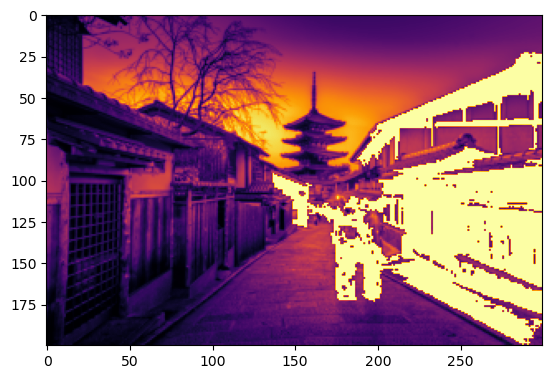

In [26]:
pds = a.get_persistence()
sorted_index = np.argsort(pds[:,4])
pds = pds[sorted_index]

imgg = img.copy()
for i in range(1,2):
    vert = int(pds[-i][2])
    idxs = np.unravel_index(a.bht.get_descendants(vert), img.shape)

    imgg[idxs] = 1

plt.imshow(imgg, cmap=cmap)

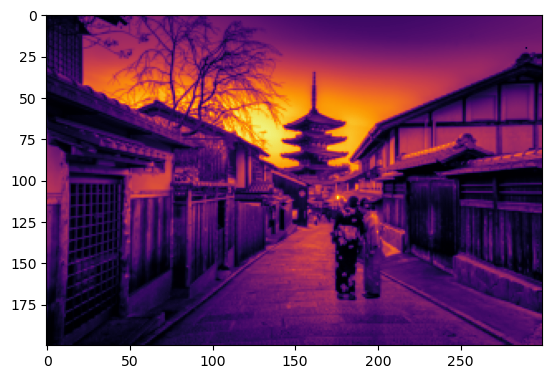

In [27]:
pds = b.get_persistence()
sorted_index = np.argsort(pds[:,4])
pds = pds[sorted_index]

imgg = img.copy()
for i in range(1,2):
    vert = int(pds[-i][2])
    idxs = np.unravel_index(b.bht.get_descendants(vert), img.shape)

    imgg[idxs] = 0

plt.imshow(imgg, cmap=cmap)

In [28]:
n,m = 800,800
img = resize(skimage.data.camera(),(n,m))
dual = False
thresholds=[0.0,0.1,0.3,0.6] # filtering thresholds

%time tf = ta.TopologicalFilterImage(img, dual=dual)
for i,s in enumerate(thresholds):
    print("\nepsilon",s)
    print("Compute persistence everytime")
    %time u = tf.low_pers_filter(s)


CPU times: user 750 μs, sys: 431 μs, total: 1.18 ms
Wall time: 667 μs

epsilon 0.0
Compute persistence everytime
CPU times: user 352 ms, sys: 10.1 ms, total: 362 ms
Wall time: 122 ms

epsilon 0.1
Compute persistence everytime
CPU times: user 90.8 ms, sys: 852 μs, total: 91.6 ms
Wall time: 31.2 ms

epsilon 0.3
Compute persistence everytime
CPU times: user 61.5 ms, sys: 584 μs, total: 62.1 ms
Wall time: 31.1 ms

epsilon 0.6
Compute persistence everytime
CPU times: user 31.3 ms, sys: 757 μs, total: 32.1 ms
Wall time: 32.1 ms


## Toy example with a planar graph

In [29]:
# Defining a graph with faces

edges = np.array([
    [0, 1], [1, 2], [2, 3], [3, 4], [4, 5],
    [5, 6], [1, 5], [1, 7], [5, 7], [1, 8], 
    [8, 9], [9, 10], [10, 5], [8,11],
    [11, 5], [10, 12], [12, 13], [13,14], [14,15],
    [15,16], [16,6], [10,17], [17,14], [5,18],
    [18,16], [18,17],
    [9,19], [19,20], [20,21], [21,22], [22,23], [23,24], [24,25],
    [25,9],
    [26,27], [27,28], [28,29], [29,30], [30,26],
    [21,26], [19,27], [28,25], [23,29],
    [27,31], [28,31], [30,31],
    [0,32], [32,33], [33,34], [34,35], [35,36], [36,19],
    [19,8],
    [35,33], [33,37], [37,38], [38,39], [39,40], [40,37],
    [38,41], [40,41], [40,42], [42,0], [21,35], [12,25]
])
n_nodes = np.max(edges) + 1
faces = [[1,2,3,4,5], [1,2,3,4,5,7], [8,9,10,5,11], 
         [1,5,11, 8], [10,17,14,13,12], [5,18,17,10], 
         [14,15,16,18,17], [6,5,18,16],
         [19,9,25,28,27], [23,24,25,28,29], [21,22,23,29,30,26],
         [19,20,21,26,27], [26,27,31,30], [28,29,30,31],
         [27,28,31],
         [0,1,8,19,36,35,33,37,38,39,40,42],
         [33,34,35], [0,32,33,37,40,42],
         [37,38,41,40],[38,39,40,41]]
holes = [[0,1,7,5,6,16,15,14,13,12,25,24,23,22,21,35,34,33,32],
         [19,20,21,35,36],
         [8,9,19],
         [9,10,12,25]]

pos = np.array([
    [-3, 0.2],   # v0
    [-2, 3],   # v1
    [-0.8, 2],   # v2
    [ 0, 1.6],   # v3
    [ 0.8, 2],   # v4
    [ 2, 3],   # v5
    [ 3, 0.2],   # v6
    [ 0, -0.4],  # v7 (below v3-v5)
    [ -2, 5.0],  # v8 
    [ 0, 6.4],  # v9 
    [ 2, 5.0],   # v10
    [ 0, 4.0],   # v11
    [ 4, 6.0],  # v12
    [ 7, 5.0],   # v13
    [ 7, 3.0],   # v14
    [ 6.3, 1.3],   # v15
    [ 5, 0.0],   # v16
    [ 4.5, 4.0],  # v17
    [ 3.5, 2.0],  # v18
    [ -4.0, 7.0],  # v19
    [ -4.0, 9.0],  # v20
    [ -3.0, 11.0],  # v21
    [ 0.0, 13.0],  # v22
    [ 3.0, 11.0],  # v23
    [4.0, 9.0],  # v24
    [4.0, 7.0],  # v25
    [ -1.5, 10.0],  # v26
    [ -1.5, 8.0],  # v27
    [ 1.5, 8.0],  # v28
    [ 1.5, 10.0],  # v29
    [ 0, 11.0],  # v30
    [ 0.0, 9.3],  # v31
    [ -5, 1.0],  # v32
    [ -7, 3.0],  # v33
    [ -9, 5.0],   # v34
    [ -7.5, 6.5],   # v35
    [ -5.5, 7.0],   # v36
    [ -6, 5.0],   # v37
    [ -4, 5.5],   # v38
    [ -3, 4.0],   # v39
    [ -4, 3.0],   # v40
    [ -4, 4.0],   # v41
    [ -3.5, 1.5],   # v42
])

pos_dict = {i: tuple(coord) for i, coord in enumerate(pos)}

In [30]:
# Signal
np.random.seed(0)
signal = np.zeros(43, dtype=float)
boundaries = np.array([0,1,8,19,36,35,34,33,32,
                       20,21,22,23,24,25,
                       9,10,5,7,
                       12,13,14,15,16,6])
inner_boundaries = np.array([37,38,39,40,17,26,27,28,29,30,2,4,11])
remaining = [41,3,31,18]

signal[boundaries] = np.random.rand(len(boundaries))*5
signal[inner_boundaries] = np.random.rand(len(inner_boundaries))*5 + 5
signal[remaining] = np.random.rand(len(remaining))*2

max_signal = np.max(signal)
signal = signal / max_signal

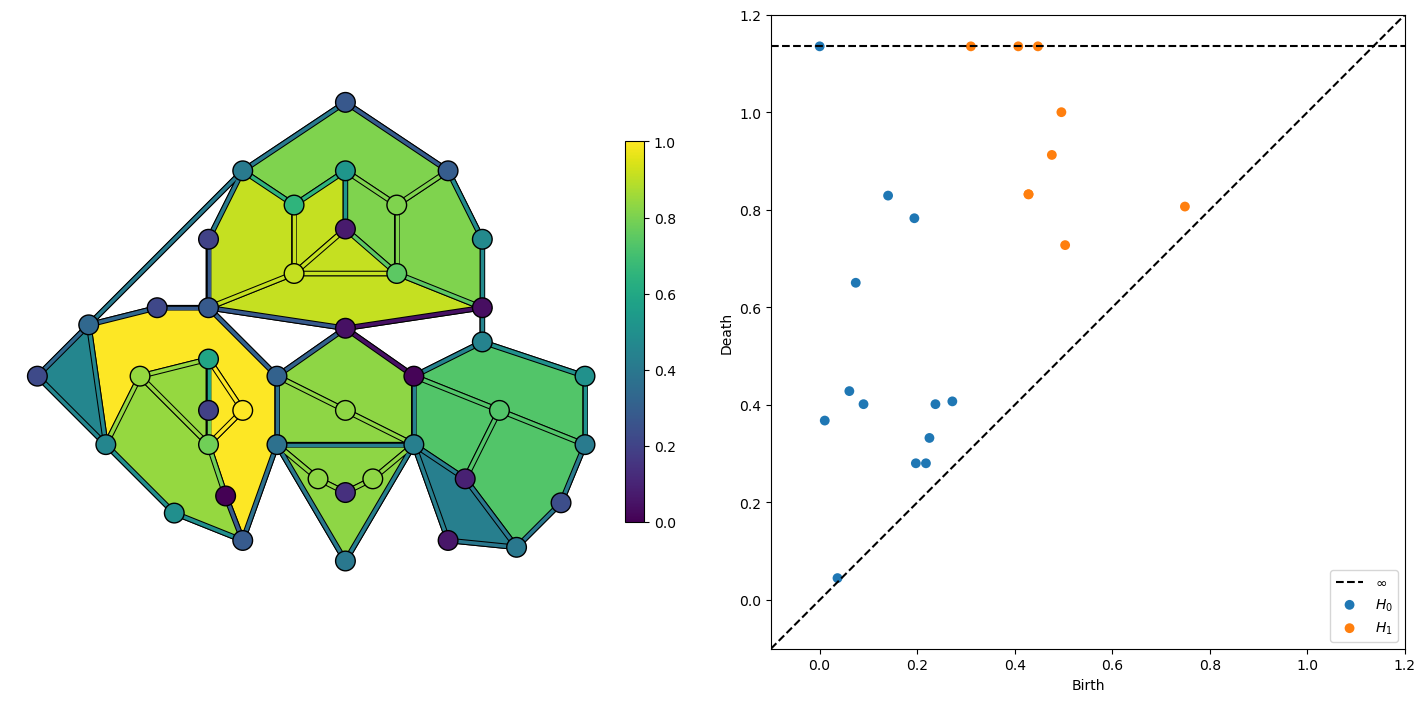

In [46]:
from topapprox.persistence import get_PD_gwf

fig, ax = plt.subplots(1, 2, figsize=(18, 12))
gwf = ta.GraphWithFaces(F=faces, H=holes, E=edges, signal=signal, compute="normal")
gwf.draw(pos=pos_dict, ax=ax[0], face_alpha=1.0, linewidth=4.0)
pd = get_PD_gwf(F=faces, H=holes, E=edges, signal=signal)
persim.plot_diagrams(pd, ax=ax[1], size=50)

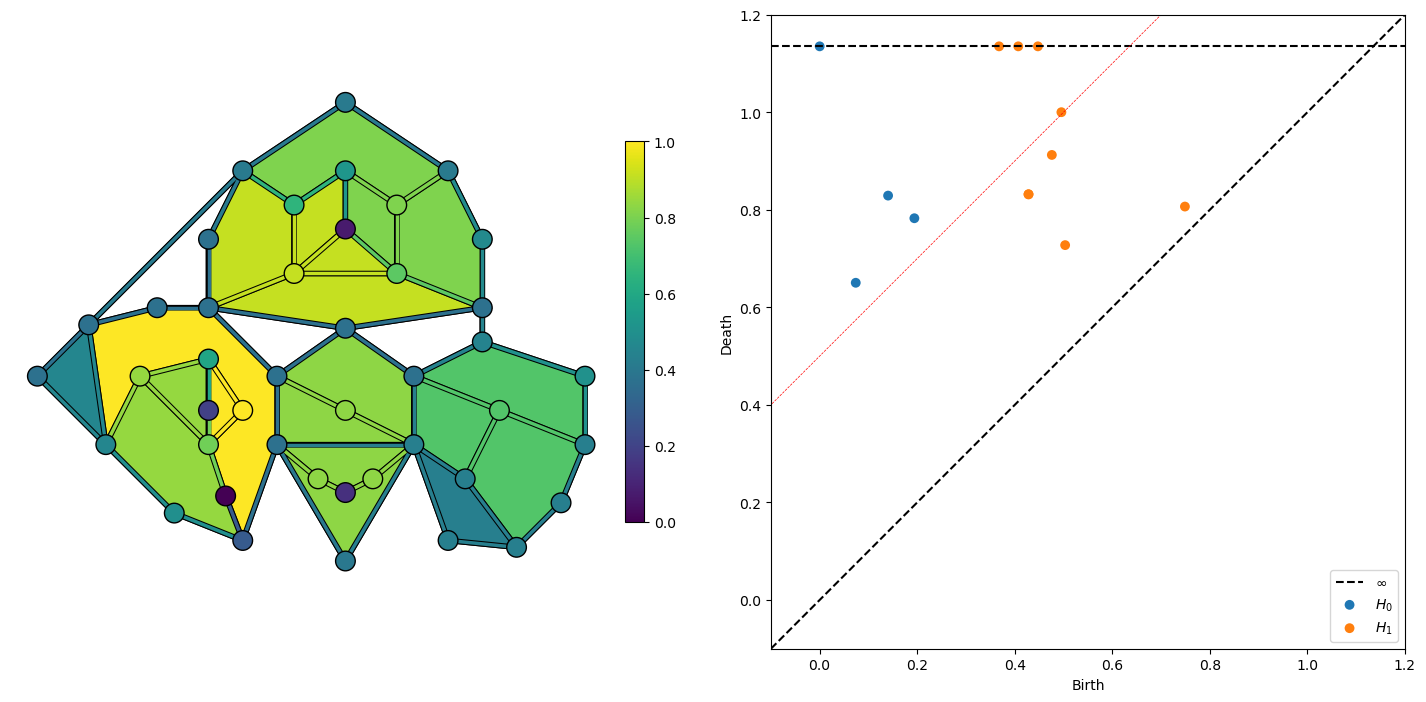

In [47]:
s = 0.5
tfg = ta.TopologicalFilterGraph(gwf=gwf, dual=False)
filter_0_hom = tfg.low_pers_filter(epsilon=s)

sig_for_plotting = filter_0_hom[:43]

fig, ax = plt.subplots(1, 2, figsize=(18, 12))
gwf.draw(pos=pos_dict, ax=ax[0], face_alpha=1.0, linewidth=4.0, signal=sig_for_plotting)
pd = get_PD_gwf(F=faces, H=holes, E=edges, signal=sig_for_plotting)
persim.plot_diagrams(pd, ax=ax[1], size=50)
ax[1].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")


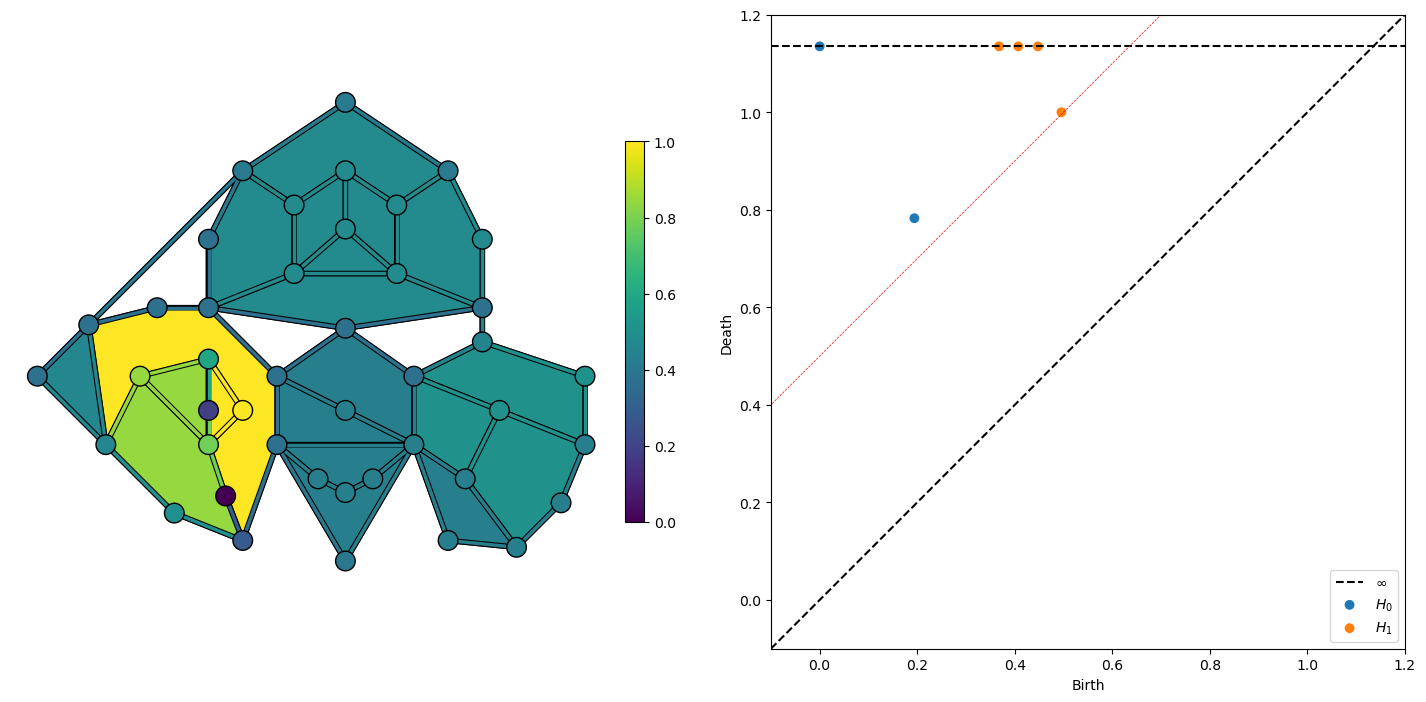

In [48]:
# filtering 1 homology classes
s = 0.5
gwf = ta.GraphWithFaces(F=faces, H=holes, E=edges, signal=sig_for_plotting, compute="dual")
tfg = ta.TopologicalFilterGraph(gwf=gwf, dual=True)
filter_0_and_1_hom = tfg.low_pers_filter(epsilon=s)

sig_for_plotting = filter_0_and_1_hom[:43]

# filtering 0 homology classes
s = 0.5
gwf = ta.GraphWithFaces(F=faces, H=holes, E=edges, signal=sig_for_plotting, compute="normal")
tfg = ta.TopologicalFilterGraph(gwf=gwf, dual=False)
filter_0_and_1_hom = tfg.low_pers_filter(epsilon=s)

sig_for_plotting = filter_0_and_1_hom[:43]

fig, ax = plt.subplots(1, 2, figsize=(18, 12))
gwf.draw(pos=pos_dict, ax=ax[0], face_alpha=1.0, linewidth=4.0, signal=sig_for_plotting)
pd = get_PD_gwf(F=faces, H=holes, E=edges, signal=sig_for_plotting)
persim.plot_diagrams(pd, ax=ax[1], size=50)
ax[1].plot([-5,5], [-5+s,5+s], '--', linewidth=0.5, c="r")
